In [1]:
import sys
sys.path.append(r"..")

In [2]:
from modules.data import get_dataset_df, pkl_dump, pkl_load

import pandas as pd
import numpy as np

import os
from pathlib import Path

from matplotlib import pyplot as plt

import cv2

In [3]:
dataset_dir = Path("../input/cats_dogs_dataset")

In [4]:
dataset_df = {
    "train": get_dataset_df(dataset_dir / "train", "train_df"),
    "valid": get_dataset_df(dataset_dir / "valid", "valid_df"),
    
}
pkl_dump(dataset_df, "dataset_df.pkl")

valid_df: 100%|██████████| 400/400 [00:02<00:00, 181.20it/s]


In [5]:
# class distribution
for split in dataset_df:
    print(f"{split} - {(dataset_df[split].cls == 1).mean()}")

train - 0.3051926298157454
valid - 0.315


In [6]:
colors = {
    "train": "red",
    "valid": "blue",
}

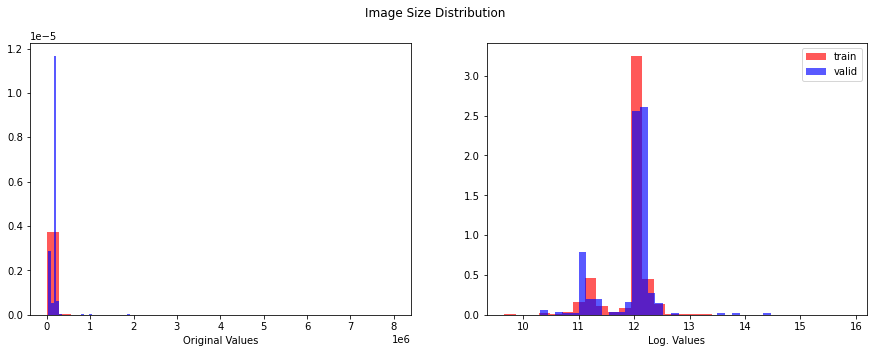

In [7]:
# Image Size Distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Image Size Distribution')

for split in dataset_df:
    df = dataset_df[split]
    df["area"] = df["height"] * df["width"]    
    
    ax1.hist(df["area"], density=True, alpha=0.65, bins=30, label=split, color=colors[split])
    ax1.set_xlabel('Original Values')
    
    ax2.hist(np.log(df["area"]), density=True, alpha=0.65, bins=30, label=split, color=colors[split])
    ax2.set_xlabel('Log. Values')
    
plt.legend()
plt.show()

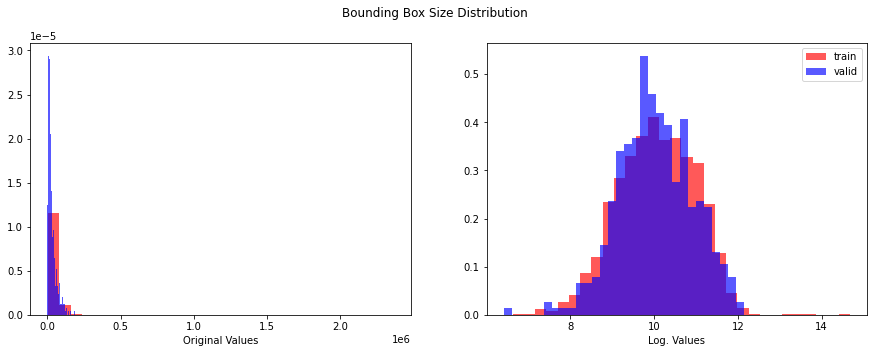

In [8]:
# Bounding Box Size Distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Bounding Box Size Distribution')

for split in dataset_df:
    df = dataset_df[split]
    df["bb_area"] = ((df["xmax"] - df["xmin"]) * (df["ymax"] - df["ymin"]))
    
    ax1.hist(df["bb_area"], density=True, alpha=0.65, bins=30, label=split, color=colors[split])
    ax1.set_xlabel('Original Values')
    
    ax2.hist(np.log(df["bb_area"]), density=True, alpha=0.65, bins=30, label=split, color=colors[split])
    ax2.set_xlabel('Log. Values')
    
plt.legend()
plt.show()

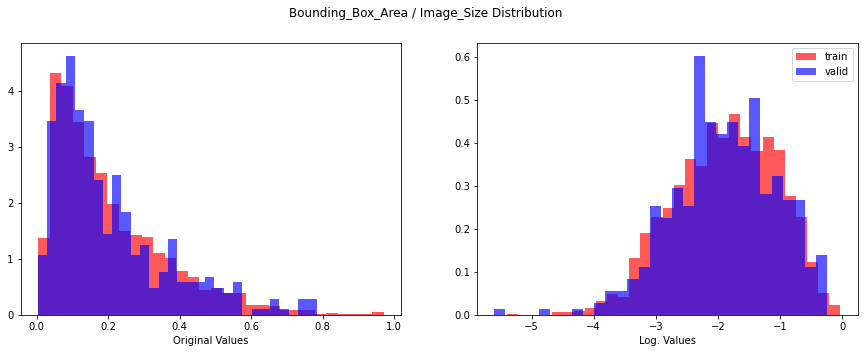

In [9]:
# Bounding_Box_Area / Image_Size Distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Bounding_Box_Area / Image_Size Distribution')

for split in dataset_df:
    df = dataset_df[split]
    df["bb_share"] = df["bb_area"] / df["area"]
    
    ax1.hist(df["bb_share"], density=True, alpha=0.65, bins=30, label=split, color=colors[split])
    ax1.set_xlabel('Original Values')
    
    ax2.hist(np.log(df["bb_share"]), density=True, alpha=0.65, bins=30, label=split, color=colors[split])
    ax2.set_xlabel('Log. Values')
    
plt.legend()
plt.show()

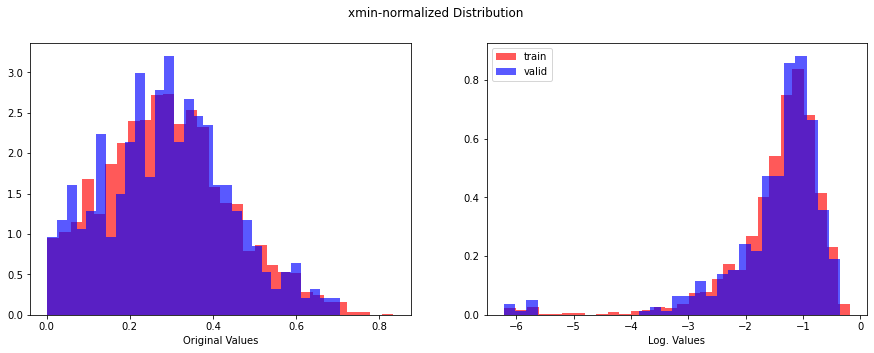

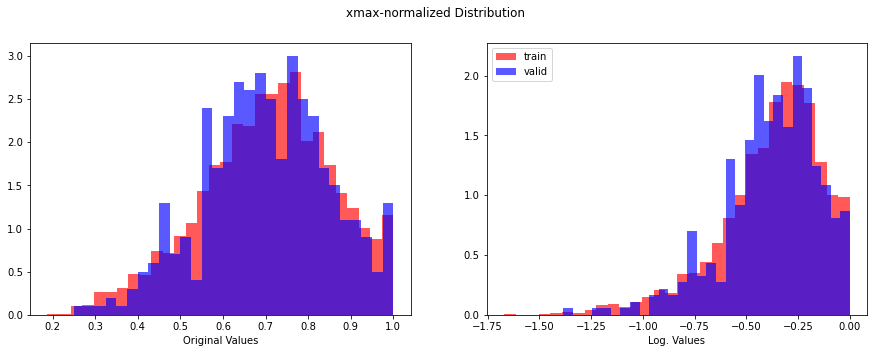

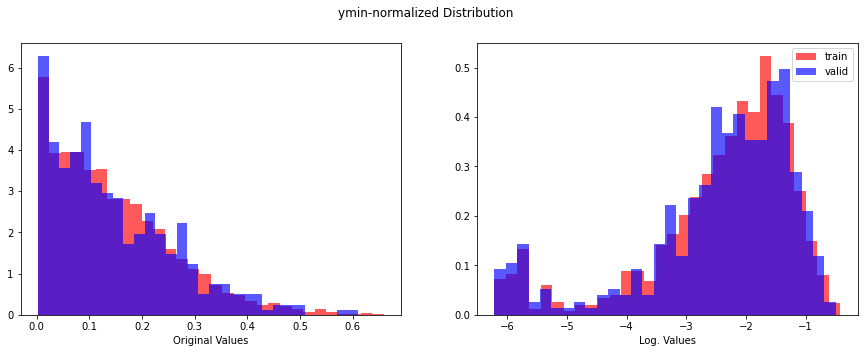

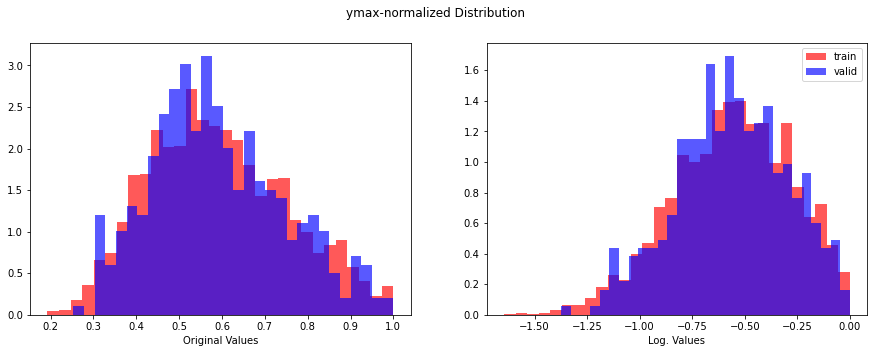

In [10]:
# Coordinates Distribution
for coord in ["xmin", "xmax", "ymin", "ymax"]:
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(f'{coord}-normalized Distribution')

    for split in dataset_df:
        df = dataset_df[split]
        dimension = "width" if coord[0] == "x" else "height"
        values = df[coord] / df[dimension]

        ax1.hist(values, density=True, alpha=0.65, bins=30, label=split, color=colors[split])
        ax1.set_xlabel('Original Values')

        ax2.hist(np.log(values), density=True, alpha=0.65, bins=30, label=split, color=colors[split])
        ax2.set_xlabel('Log. Values')

    plt.legend()
    plt.show()